In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('/content/drive/MyDrive/Datascience/Loan Prediction/train_ctrUa4K.csv')
test = pd.read_csv('/content/drive/MyDrive/Datascience/Loan Prediction/test_lAUu6dG.csv')

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [35]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

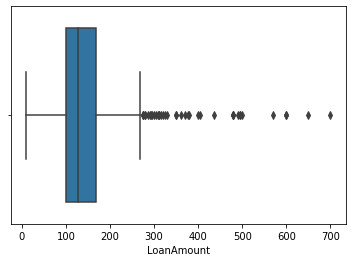

In [36]:
loanamount = sns.boxplot(train['LoanAmount'])

**Bivariate Analysis - Categorical features**


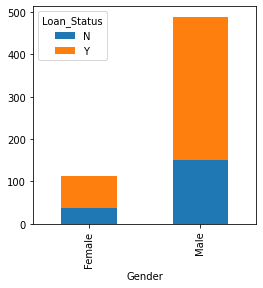

In [37]:
gender = pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))


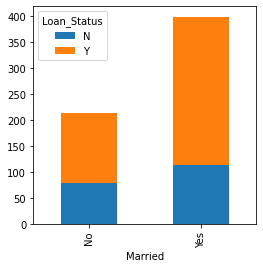

In [38]:
married = pd.crosstab(train['Married'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

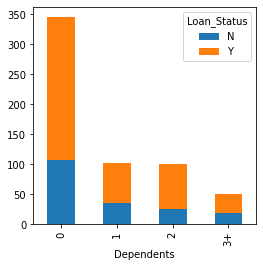

In [39]:
dependents = pd.crosstab(train['Dependents'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

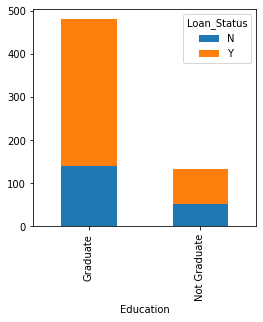

In [40]:
education = pd.crosstab(train['Education'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

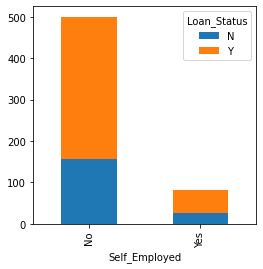

In [41]:
self_employed = pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

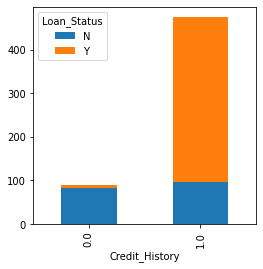

In [42]:
credit_history = pd.crosstab(train['Credit_History'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

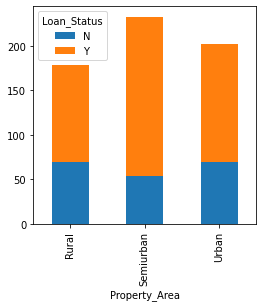

In [43]:
property_area = pd.crosstab(train['Property_Area'],train['Loan_Status']).plot(kind="bar", stacked = True, figsize=(4,4))

**Bivariate analysis - Numerical features**

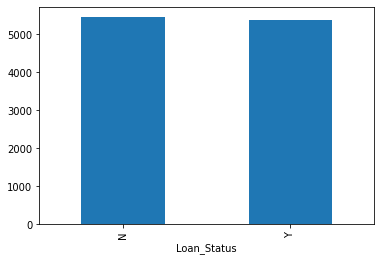

In [44]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

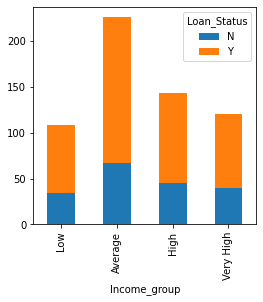

In [45]:
#Make bins for appicant income
bins = [0,2500,4000,6000,18000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_group'] = pd.cut(train['ApplicantIncome'], bins, labels=group)
income_group = pd.crosstab(train['Income_group'],train['Loan_Status']).plot(kind = 'bar', stacked=True, figsize=(4,4))

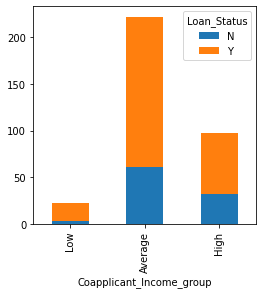

In [46]:
#Make bins for coapplicant income
bins = [0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_group'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)
Coapp_income_group = pd.crosstab(train['Coapplicant_Income_group'],train['Loan_Status']).plot(kind = 'bar', stacked=True, figsize=(4,4))

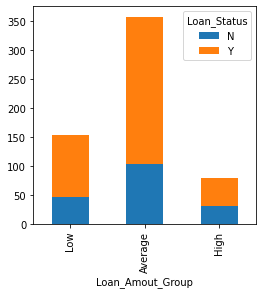

In [47]:
bins = [0,100,200,700]
group=['Low', 'Average', 'High']
train['Loan_Amout_Group'] = pd.cut(train['LoanAmount'], bins, labels=group)
loan_income_group = pd.crosstab(train['Loan_Amout_Group'],train['Loan_Status']).plot(kind = 'bar', stacked=True, figsize=(4,4))

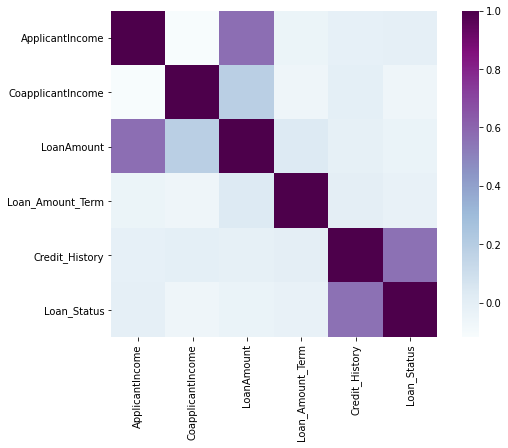

In [48]:
train['Loan_Status'].replace('N',0,inplace =True)
train['Loan_Status'].replace('Y',1,inplace =True)
corr_matrix = train.corr()
f, ax =plt.subplots(figsize = (9,6))
sns.heatmap(corr_matrix, square = True,  cmap = 'BuPu')

In [49]:
#drop the newly added columns
train = train.drop(['Coapplicant_Income_group', 'Loan_Amout_Group'], axis = 1)
train = train.drop(['Income_group'], axis = 1)

In [50]:
# check missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)



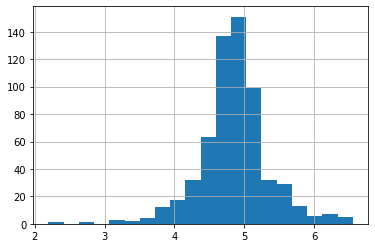

In [52]:
# Handling outliers in the Loan Amount column
train['Loan_Amount_Log'] = np.log(train['LoanAmount'])
train['Loan_Amount_Log'].hist(bins = 20)

In [53]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
test['Loan_Amount_Log'] = np.log(test['LoanAmount'])

In [54]:
train = train.drop(['Loan_ID'], axis = 1)
test = test.drop(['Loan_ID'], axis = 1)

In [55]:
X = train.drop(['Loan_Status'], axis = 1)
y= train['Loan_Status']

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [56]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Stratified K fold cross validation**

In [73]:
#######  Logistic regression #######

from sklearn.model_selection import StratifiedKFold
i = 1
score_mat = []
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model  = LogisticRegression(random_state = 1)
  model.fit(xtr,ytr)
  pred = model.predict(xvl)
  score = accuracy_score(yvl, pred)
  score_mat.append(score)
  print(score)

  i+=1

print('Mean accuracy', np.mean(score_mat))




1 of kfold 5
0.8048780487804879

2 of kfold 5
0.8373983739837398

3 of kfold 5
0.7804878048780488

4 of kfold 5
0.7886178861788617

5 of kfold 5
0.7950819672131147
Mean accuracy 0.8012928162068507


In [72]:
####### Decision Tree ######

from sklearn import tree

score_mat = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state= 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr,xvl = X.loc[train_index], X.loc[test_index]
  ytr,yvl = y[train_index], y[test_index]

  model = tree.DecisionTreeClassifier(random_state = 1)
  model.fit(xtr, ytr)
  dt_pred = model.predict(xvl)
  score =accuracy_score(yvl, dt_pred)
  score_mat.append(score)
  print(score)

  i+=1
print('Mean accuracy', np.mean(score_mat))


1 of kfold 5
0.7073170731707317

2 of kfold 5
0.7235772357723578

3 of kfold 5
0.7073170731707317

4 of kfold 5
0.7154471544715447

5 of kfold 5
0.6885245901639344
Mean accuracy 0.70843662534986


In [64]:
######## Random Forest classifier with hyperparatmeter tuning ##########

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#hypertuning n_estimators and max_depth
paramgrid = {'max_depth' : list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=1, test_size = 0.3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [65]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [71]:
#### Using the optimized values of the classifier with K fold cross validation ####

i = 1
score_mat = []
kf = StratifiedKFold(n_splits=5, shuffle= True, random_state=1)
for train_index, test_index in kf.split(X,y):
  print('\n{} kfold in {}'.format(i, kf.n_splits))
  xtr,xvl = X.loc[train_index], X.loc[test_index]
  ytr,yvl = y[train_index], y[test_index]
  model = RandomForestClassifier(max_depth =9, n_estimators= 81, random_state=1)
  model.fit(xtr, ytr)
  rf_pred = model.predict(xvl)
  score = accuracy_score(yvl, rf_pred)
  score_mat.append(score)
  print(score)

  i+=1
print('Mean accuracy', np.mean(score_mat))  


1 kfold in 5
0.8048780487804879

2 kfold in 5
0.8455284552845529

3 kfold in 5
0.8130081300813008

4 kfold in 5
0.7967479674796748

5 kfold in 5
0.7704918032786885
Mean accuracy 0.8061308809809409


In [75]:
###### XGBoost Classifier######

from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
for train_index, test_index in kf.split(X,y):
  print('\n{} kfold in {}'.format(i, kf.n_splits))
  xtr,xvl = X.loc[train_index], X.loc[test_index]
  ytr,yvl = y[train_index], y[test_index]
  model = XGBClassifier(max_depth =4, n_estimators= 50, random_state=1)
  model.fit(xtr, ytr)
  xgb_pred = model.predict(xvl)
  score = accuracy_score(yvl, xgb_pred)
  score_mat.append(score)
  print(score)

  i+=1
print('Mean accuracy', np.mean(score_mat))  


1 kfold in 5
0.8048780487804879

2 kfold in 5
0.8211382113821138

3 kfold in 5
0.7967479674796748

4 kfold in 5
0.7886178861788617

5 kfold in 5
0.8032786885245902
Mean accuracy 0.8021124883379983
